## Amplitude Modulation with Complex Exponential Carrier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

1. 三角関数(sin, cos)と指数関数(exp)を使って20kHzの波を作る。(sample rate = 1MHz)

In [2]:
Am = 1  # Message signal amplitude
fm = 20e3   # Message signal frequency
time = 10e-3
Fs = 1e6    # Sampling rate, 1MHz
N = int(Fs * time)  # サンプル数は10msecとすると1e6 x 0.01 = 1e4

In [19]:
samples = np.linspace(0, time, N, endpoint=False)
print(samples.size)
samples

10000


array([0.000e+00, 1.000e-06, 2.000e-06, ..., 9.997e-03, 9.998e-03,
       9.999e-03])

[1.        +0.j         0.9921147 +0.12533323j 0.96858316+0.24868989j ...
 0.92977649-0.36812455j 0.96858316-0.24868989j 0.9921147 -0.12533323j]


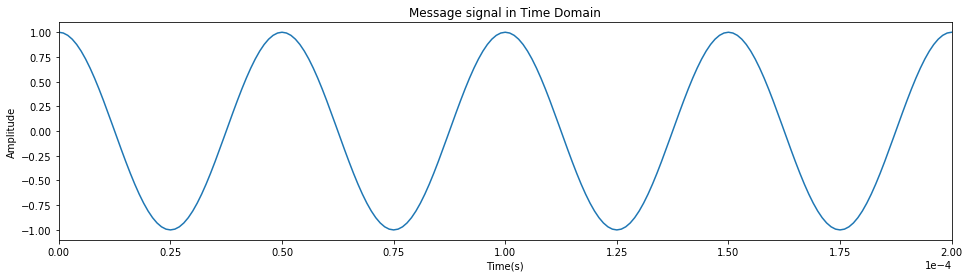

In [28]:
message_signal = Am * np.exp(2.0j * np.pi * fm * samples)
print(message_signal)

plt.figure(figsize = (16,4))
plt.plot(samples, message_signal.real)
plt.title("Message signal in Time Domain")
plt.ylabel("Amplitude")
plt.xlabel("Time(s)")
plt.xlim([0,0.0002])
plt.ticklabel_format(style='sci',axis='x',scilimits=(0,0))

2. 1をmatplotlibでvisualizeする。time domain + frequency domain(spectrum)

In [5]:
fft = np.fft.fft(message_signal)
fft

array([ 1.38344891e-12+4.38078604e-12j, -7.79380642e-13+1.42428831e-12j,
       -2.92216974e-12+4.86467182e-12j, ...,
        1.63526763e-12-2.83405080e-12j,  6.56869329e-13-9.24311670e-13j,
        5.00230004e-12+2.08064472e-12j])

In [6]:
fftfreq = np.fft.fftfreq(len(message_signal)) * Fs
fftfreq

array([   0.,  100.,  200., ..., -300., -200., -100.])

Text(0.5, 0, 'Frequency')

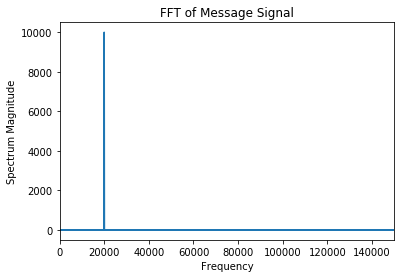

In [7]:
plt.plot(fftfreq, np.abs(fft))
plt.title('FFT of Message Signal')
plt.xlim([0, 150e3])
plt.ylabel('Spectrum Magnitude')
plt.xlabel('Frequency')

3. expで100kHzの波を作る。(carrier)

In [8]:
Ac = 1  # Carrier signal amplitude
fc = 100e3  # Carrier signal frequency

[ 1.        +0.j          0.80901699+0.58778525j  0.30901699+0.95105652j
 ... -0.30901699-0.95105652j  0.30901699-0.95105652j
  0.80901699-0.58778525j]


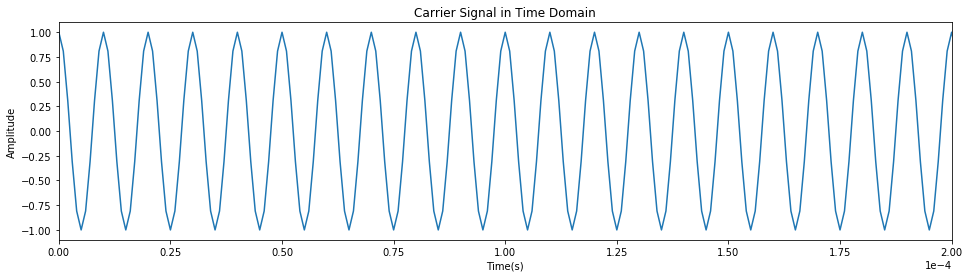

In [29]:
carrier_signal = Ac * np.exp(1.0j * 2.0 * np.pi * fc * samples)
print(carrier_signal)

plt.figure(figsize = (16,4))
plt.plot(samples, carrier_signal.real)
plt.title("Carrier Signal in Time Domain")
plt.ylabel("Amplitude")
plt.xlabel("Time(s)")
plt.xlim([0,0.0002])
plt.ticklabel_format(style='sci',axis='x',scilimits=(0,0))

In [10]:
# TODO graph complex signal

Text(0, 0.5, 'Spectrum Magnitude')

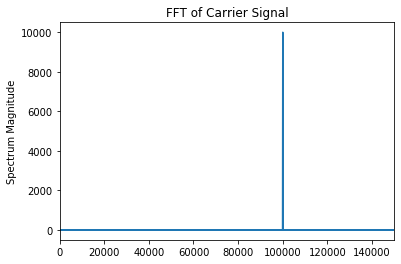

In [11]:
car_fft = np.fft.fft(carrier_signal)
car_fftfreq = np.fft.fftfreq(len(carrier_signal)) * Fs
plt.plot(car_fftfreq, np.abs(car_fft))
plt.title('FFT of Carrier Signal')
plt.xlim([0, 150e3])
plt.ylabel('Spectrum Magnitude')

4. 1と3をmix(つまりmultiply)する。(=AM)

In [12]:
modulation_index = Am / Ac
modulated_signal = Ac * (1 + modulation_index * message_signal.real) * carrier_signal
modulated_signal

array([ 2.        +0.j        ,  1.61165465+1.17093564j,
        0.60832565+1.87223384j, ..., -0.59633373-1.8353265j ,
        0.60832565-1.87223384j,  1.61165465-1.17093564j])

5. 4をvisualizeする。⇒ 80kHz と 120kHzが観測される。

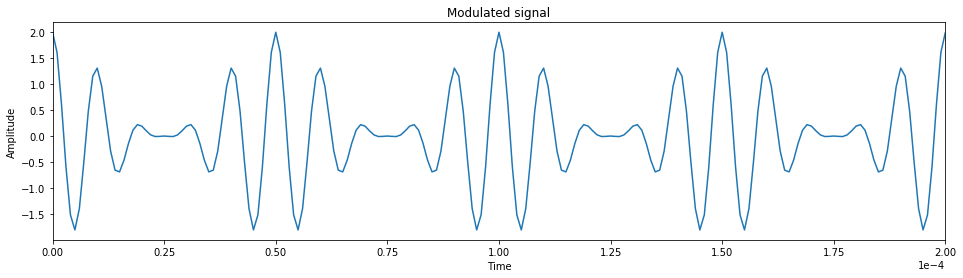

In [30]:
plt.figure(figsize = (16,4))
plt.plot(samples, modulated_signal.real)
plt.title("Modulated signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.xlim([0, 0.0002])
plt.ticklabel_format(style='sci',axis='x',scilimits=(0,0))
# TODO three graphs!! 

Text(0, 0.5, 'Spectrum Magnitude')

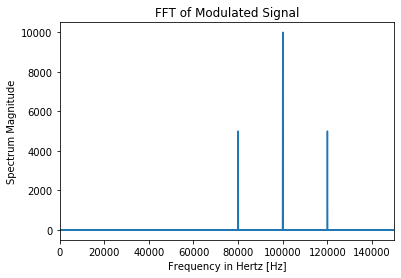

In [14]:
mod_fft = np.fft.fft(modulated_signal)
mod_fftfreq = np.fft.fftfreq(len(modulated_signal)) * Fs
plt.plot(mod_fftfreq, np.abs(mod_fft))
plt.title('FFT of Modulated Signal')
plt.xlim([0, 150e3])
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Spectrum Magnitude')

6. フィルタ(LPF)を作る。カットオフ 90kHz (フィルタの設計)

In [15]:
cutoff_freq = 90e3
normalized_cutoff_freq = (cutoff_freq / (Fs / 2)) # normalized_cutoff_freq = cutoff_freq / (sample_rate / 2)
b, a = signal.butter(16, normalized_cutoff_freq, 'low')
print('b =', b)
print('a =', a)
filtered_signal = signal.lfilter(b, a, modulated_signal)

b = [1.36639981e-10 2.18623970e-09 1.63967978e-08 7.65183896e-08
 2.48684766e-07 5.96843439e-07 1.09421297e-06 1.56316139e-06
 1.75855656e-06 1.56316139e-06 1.09421297e-06 5.96843439e-07
 2.48684766e-07 7.65183896e-08 1.63967978e-08 2.18623970e-09
 1.36639981e-10]
a = [ 1.00000000e+00 -1.02326035e+01  4.98146796e+01 -1.52937249e+02
  3.31046190e+02 -5.35202009e+02  6.67954486e+02 -6.55990995e+02
  5.12024324e+02 -3.18515421e+02  1.57311350e+02 -6.10095842e+01
  1.82071237e+01 -4.04045812e+00  6.28595523e-01 -6.12351724e-02
  2.81316014e-03]


7. 5 を 6のフィルタに通して結果をvisualizeする。⇒120kHzの波が消えて80kHzだけ残る。

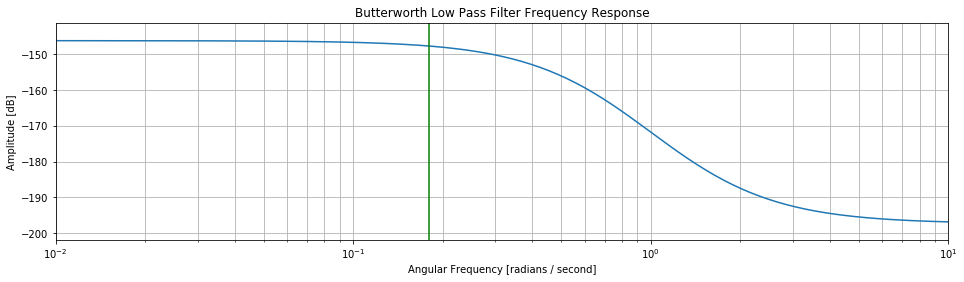

In [31]:
w, h = signal.freqs(b, a)
# print('w =', w)
# print('h =', h)

plt.figure(figsize = (16,4))
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth Low Pass Filter Frequency Response')
plt.xlabel('Angular Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(normalized_cutoff_freq, color='green')  # normalized cutoff frequency

Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

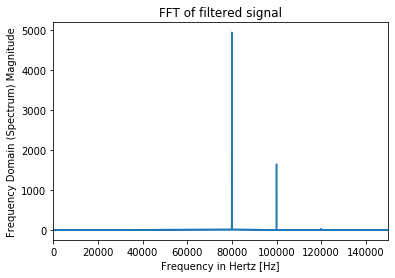

In [21]:
fft_filtered = np.fft.fft(filtered_signal)
fftfreq_filtered = np.fft.fftfreq(len(filtered_signal)) * Fs
plt.plot(fftfreq_filtered, np.abs(fft_filtered))
plt.title('FFT of filtered signal')
plt.xlim([0, 150e3])
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')

/Users/shinfernandez/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/shinfernandez/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/shinfernandez/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Spectrum Magnitude')

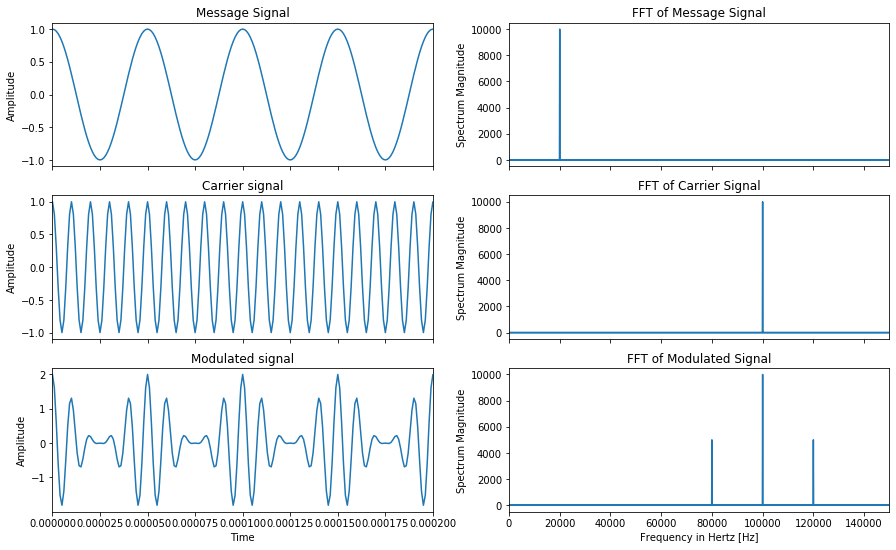

In [26]:
signal_fig, signal_axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 9), sharex='col')
signal_axes[0, 0].plot(samples, message_signal)
signal_axes[0, 0].set_title("Message Signal")
signal_axes[0, 0].set_ylabel("Amplitude")

signal_axes[0, 1].plot(fftfreq, np.abs(fft))
signal_axes[0, 1].set_title('FFT of Message Signal')
signal_axes[0, 1].set_xlim([0, 150e3])
signal_axes[0, 1].set_ylabel('Spectrum Magnitude')

signal_axes[1, 0].plot(samples, carrier_signal)
signal_axes[1, 0].set_title("Carrier signal")
signal_axes[1, 0].set_ylabel("Amplitude")

signal_axes[1, 1].plot(car_fftfreq, np.abs(car_fft))
signal_axes[1, 1].set_title('FFT of Carrier Signal')
signal_axes[1, 1].set_xlim([0, 150e3])
signal_axes[1, 1].set_ylabel('Spectrum Magnitude')

signal_axes[2, 0].plot(samples, modulated_signal)
signal_axes[2, 0].set_title("Modulated signal")
signal_axes[2, 0].set_xlabel("Time")
signal_axes[2, 0].set_ylabel("Amplitude")
signal_axes[2, 0].set_xlim([0, 0.0002])

signal_axes[2, 1].plot(mod_fftfreq, np.abs(mod_fft))
signal_axes[2, 1].set_title('FFT of Modulated Signal')
signal_axes[2, 1].set_xlim([0, 150e3])
signal_axes[2, 1].set_xlabel('Frequency in Hertz [Hz]')
signal_axes[2, 1].set_ylabel('Spectrum Magnitude')